In [36]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.mpl_style', 'default') 
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

In [46]:
flat_coalescence_stats = pd.read_csv('C:\\Users\\ronvis\\Dropbox\\Thesis\\ModelCompare\\code\\ModelCompare\\simulations\\sample\\gphocs\\data.flatStats.tsv', sep='\t')
flat_coalescence_stats.head()

,iter,coalStatFlat,numCoalFlat,migStatFlat,numMigFlat,logPrior,root_theta,logLikelihood,dataLogLikelihood,genealogyLogLikelihood
0,0,1.563964,7000,0.435464,0,74.385423,0.944200,-1344952.714294,-1407189.645891,-62236.931597
1,1,1.680680,7000,0.471674,2,74.214795,0.944200,-1343414.298617,-1404960.374097,-61546.075480
2,2,1.687730,7000,0.470062,4,73.994428,0.986701,-1342433.409935,-1404067.766776,-61634.356841
3,3,1.765420,7000,0.499956,2,73.983596,0.994815,-1342499.655522,-1403585.805025,-61086.149503
4,4,1.774833,7000,0.511522,0,73.778319,0.994815,-1342128.188013,-1403220.710703,-61092.522690


In [38]:
flat_coalescence_stats = flat_coalescence_stats[['logPrior','coalStatFlat', 'numCoalFlat', 'root_theta', 'genealogyLogLikelihood' ]]
flat_coalescence_stats.columns = ['logPrior','time_stats', 'num_coal', 'root_ϴ', 'P_Z_ϴM' ]

printFactor = 10000.0
flat_coalescence_stats['root_ϴ'] = flat_coalescence_stats[['root_ϴ']].apply(lambda x:x/printFactor)

In [39]:
def P_Z_ϴM0(theta, num_coal, time_stats):
    result = num_coal*np.log(2.0/theta) -(time_stats/theta)
    return result

In [40]:
flat_coalescence_stats['root_ϴ'] = flat_coalescence_stats[['root_ϴ']].apply(lambda x:x/1000.0)
root_ϴ = flat_coalescence_stats['root_ϴ'] 
num_coal = flat_coalescence_stats['num_coal'] 
time_stats = flat_coalescence_stats['time_stats']

flat_coalescence_stats['P_Z_ϴM0'] = P_Z_ϴM0(root_ϴ, num_coal, time_stats)

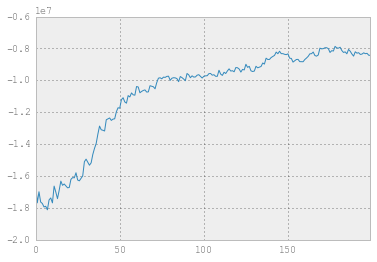

In [41]:
flat_coalescence_stats['P_Z_ϴM0'].plot()

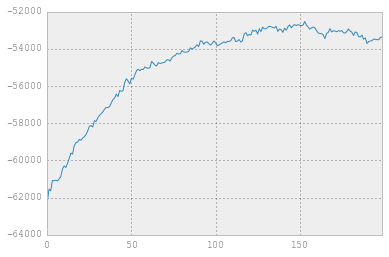

In [42]:
flat_coalescence_stats['P_Z_ϴM'].plot()

In [43]:
flat_coalescence_stats.describe()

,logPrior,time_stats,num_coal,root_ϴ,P_Z_ϴM,P_Z_ϴM0
count,200.000000,200.000000,200,2.000000e+02,200.000000,200.000000
mean,62.325799,3.735325,7000,3.799498e-07,-54824.245752,-10793910.315791
std,5.256136,0.832373,0,1.417645e-07,2409.797713,2961707.028895
min,55.940517,1.563964,7000,9.442000e-08,-62236.931597,-18120230.873085
25%,58.458435,3.358259,7000,2.817305e-07,-55612.762435,-11724770.022018
50%,60.145245,4.128891,7000,4.202585e-07,-53682.446424,-9710753.191845
75%,64.977886,4.374220,7000,4.971412e-07,-53110.958501,-8606216.858891
max,74.385423,4.624727,7000,5.521808e-07,-52533.675516,-7868647.181116


In [44]:
flat_coalescence_stats.head()

,logPrior,time_stats,num_coal,root_ϴ,P_Z_ϴM,P_Z_ϴM0
0,74.385423,1.563964,7000,9.442000e-08,-62236.931597,-16445825.331412
1,74.214795,1.680680,7000,9.442000e-08,-61546.075480,-17681961.743189
2,73.994428,1.687730,7000,9.867010e-08,-61634.356841,-16987004.004245
3,73.983596,1.765420,7000,9.948150e-08,-61086.149503,-17628499.030971
4,73.778319,1.774833,7000,9.948150e-08,-61092.522690,-17723119.638823


In [45]:
flat_coalescence_stats.sort_values(by='P_Z_ϴM', ascending=False).head()

,logPrior,time_stats,num_coal,root_ϴ,P_Z_ϴM,P_Z_ϴM0
153,58.758464,4.624727,7000,5.161548e-07,-52533.675516,-8853771.192356
147,58.707996,4.532134,7000,5.376243e-07,-52695.707917,-8324022.968302
149,59.082735,4.544514,7000,5.350988e-07,-52702.579233,-8386912.561017
144,59.008548,4.559043,7000,5.405149e-07,-52713.462022,-8328762.410961
154,58.498065,4.527712,7000,5.098125e-07,-52719.800405,-8774855.198603
